In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [15]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [16]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [17]:
mean_bmi = df.groupby('HeartDisease')['BMI'].mean()

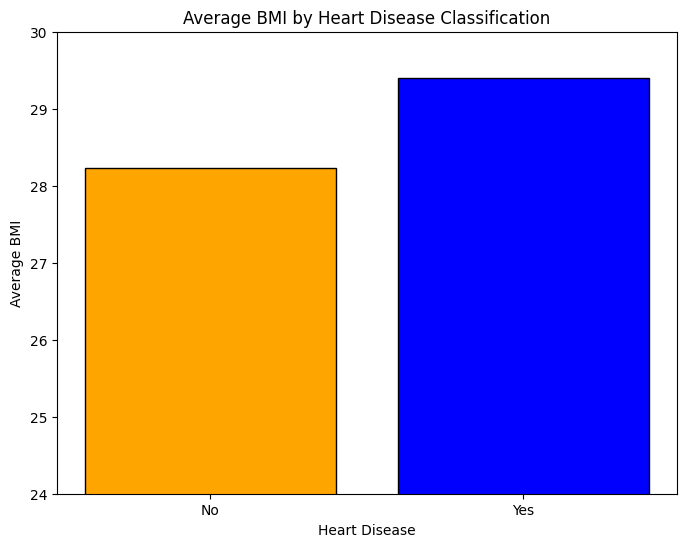

In [18]:
plt.figure(figsize=(8, 6))
plt.bar(mean_bmi.index, mean_bmi.values, color=['orange', 'blue'], edgecolor='black', )
plt.ylim(24,30)
plt.xlabel('Heart Disease')
plt.ylabel('Average BMI')
plt.title('Average BMI by Heart Disease Classification')
plt.xticks(rotation=0)
plt.show()

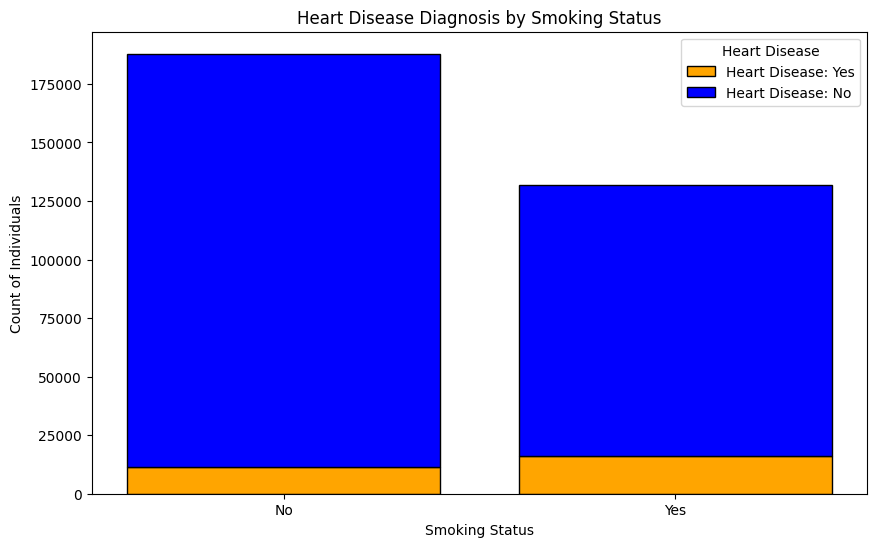

In [19]:
heart_disease_counts_smoking = df.groupby(['Smoking', 'HeartDisease']).size().unstack()

plt.figure(figsize=(10, 6))
plt.bar(heart_disease_counts_smoking.index, heart_disease_counts_smoking['Yes'], label='Heart Disease: Yes', color='orange', edgecolor='black')
plt.bar(heart_disease_counts_smoking.index, heart_disease_counts_smoking['No'], bottom=heart_disease_counts_smoking['Yes'], label='Heart Disease: No', color='blue', edgecolor='black')
plt.xlabel('Smoking Status')
plt.ylabel('Count of Individuals')
plt.title('Heart Disease Diagnosis by Smoking Status')
plt.legend(title='Heart Disease')
plt.xticks(rotation=0)
plt.show()

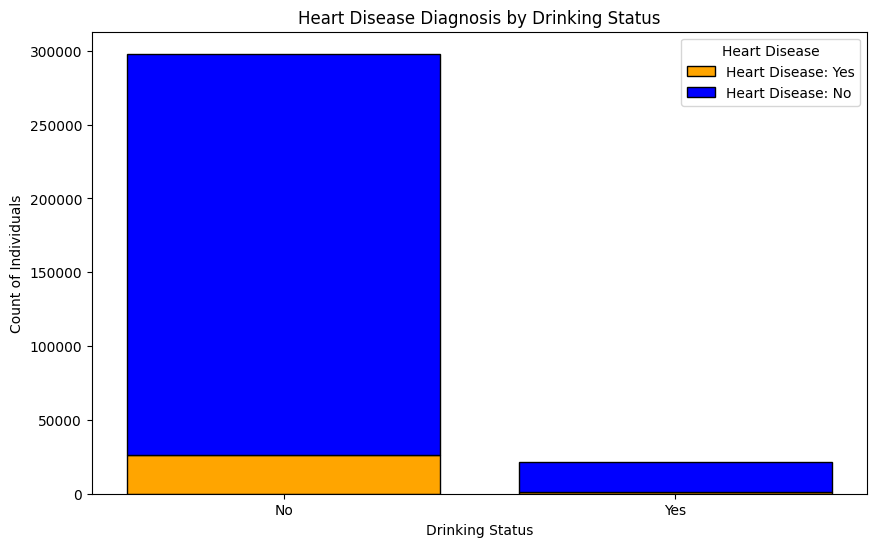

In [20]:
heart_disease_counts_alcohol = df.groupby(['AlcoholDrinking', 'HeartDisease']).size().unstack()

plt.figure(figsize=(10, 6))
plt.bar(heart_disease_counts_alcohol.index, heart_disease_counts_alcohol['Yes'], label='Heart Disease: Yes', color='orange', edgecolor='black')
plt.bar(heart_disease_counts_alcohol.index, heart_disease_counts_alcohol['No'], bottom=heart_disease_counts_alcohol['Yes'], label='Heart Disease: No', color='blue', edgecolor='black')
plt.xlabel('Drinking Status')
plt.ylabel('Count of Individuals')
plt.title('Heart Disease Diagnosis by Drinking Status')
plt.legend(title='Heart Disease')
plt.xticks(rotation=0)
plt.show()

In [21]:
no_hd = df[df['HeartDisease'] == 'No']
yes_hd = df[df['HeartDisease'] == 'Yes']
total_counts = df.groupby('AlcoholDrinking').size()

no_hd_counts = no_hd.groupby('AlcoholDrinking').size()
yes_hd_counts = yes_hd.groupby('AlcoholDrinking').size()

proportion_no_heart_disease = no_hd_counts / total_counts
print('HD NO\n', proportion_no_heart_disease, '\n')

proportion_yes_heart_disease = yes_hd_counts / total_counts
print('HD YES\n', proportion_yes_heart_disease)

HD NO
 AlcoholDrinking
No     0.911978
Yes    0.947605
dtype: float64 

HD YES
 AlcoholDrinking
No     0.088022
Yes    0.052395
dtype: float64


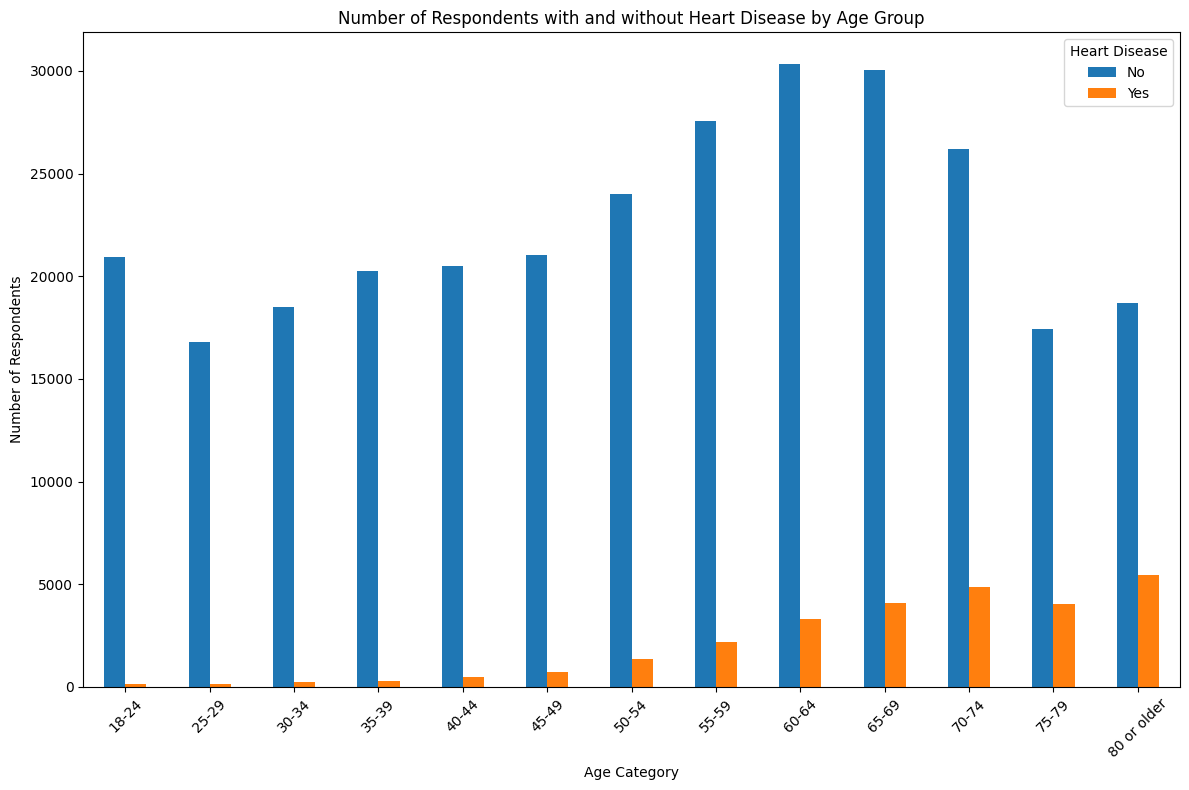

In [22]:

heart_disease_counts = df.groupby(['AgeCategory', 'HeartDisease']).size().unstack(fill_value=0)

heart_disease_counts.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title("Number of Respondents with and without Heart Disease by Age Group")
plt.xlabel("Age Category")
plt.ylabel("Number of Respondents")
plt.legend(title="Heart Disease")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
print(df['BMI'].max())

94.85


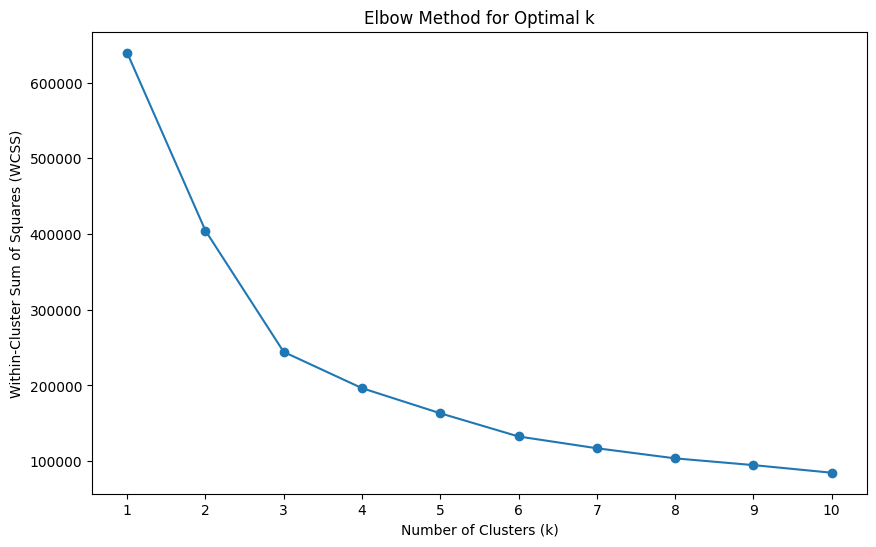

In [26]:
data = df[['BMI', 'AgeCategory']].copy()

label_encoder = LabelEncoder()
data['AgeCategory'] = label_encoder.fit_transform(data['AgeCategory'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

wcss = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(cluster_range)
plt.show()

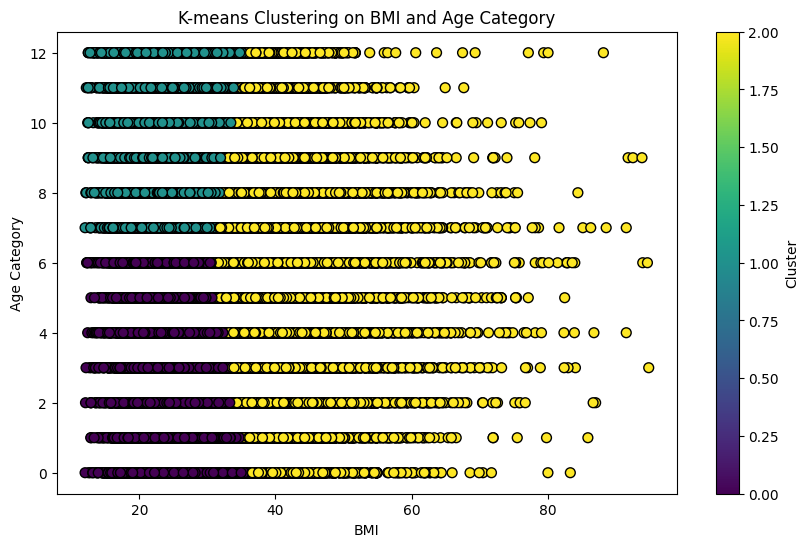

In [30]:

label_encoder = LabelEncoder()
data['AgeCategory'] = label_encoder.fit_transform(data['AgeCategory'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(data['BMI'], data['AgeCategory'], c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-means Clustering on BMI and Age Category')
plt.xlabel('BMI')
plt.ylabel('Age Category')
plt.colorbar(label='Cluster')
plt.show()

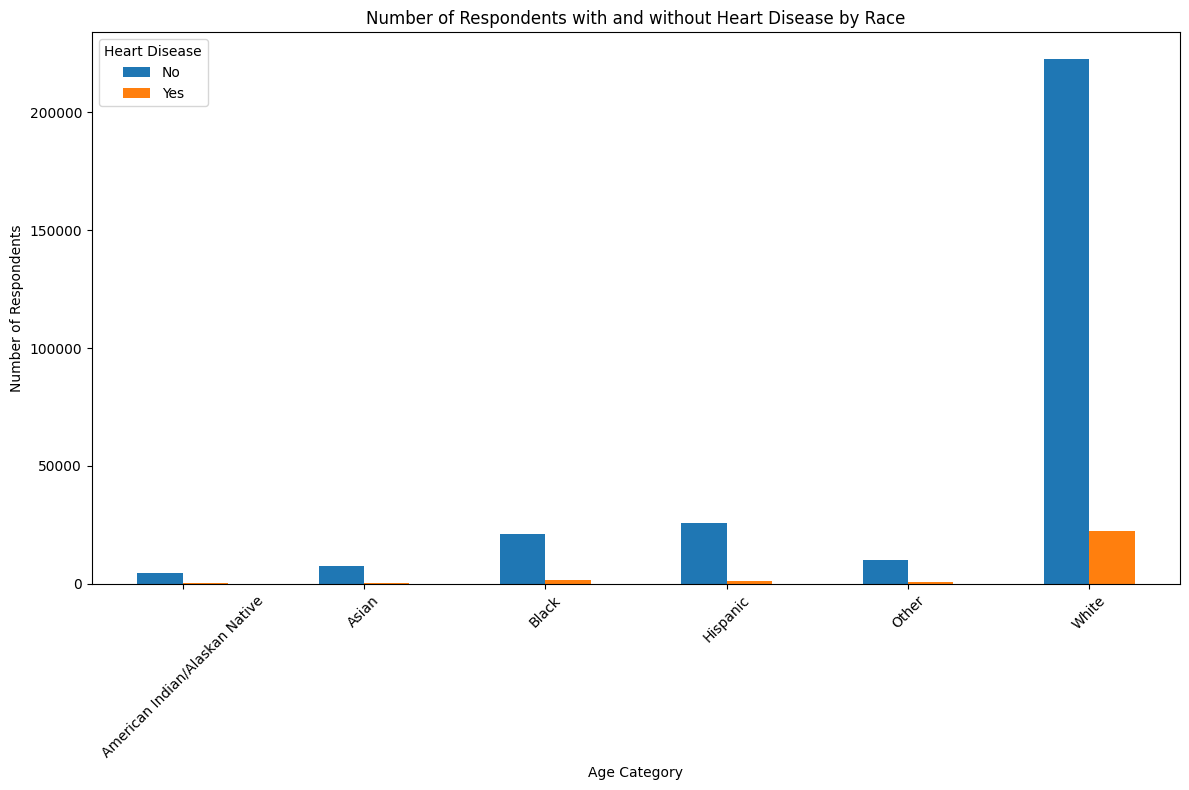

In [44]:
heart_disease_counts_2 = df.groupby(['Race', 'HeartDisease']).size().unstack(fill_value=0)

heart_disease_counts_2.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title("Number of Respondents with and without Heart Disease by Race")
plt.xlabel("Age Category")
plt.ylabel("Number of Respondents")
plt.legend(title="Heart Disease")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:

total_counts = heart_disease_counts_2.sum(axis=1)

heart_disease_proportion = heart_disease_counts_2["Yes"] / total_counts

print("Proportion of people with heart disease in each racial group:")
print(heart_disease_proportion)


Proportion of people with heart disease in each racial group:
Race
American Indian/Alaskan Native    0.104191
Asian                             0.032970
Black                             0.075374
Hispanic                          0.052576
Other                             0.081076
White                             0.091786
dtype: float64
